In [209]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

### Dataset:
Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

Donated by:
p. Savicky
Institute of Computer Science, AS of CR
Czech Republic
savicky '@' cs.cas.cz

In [210]:
cols =["fLength", "fWidth", "fSize", "fConc", "fConc1", "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist", "class"]
df = pd.read_csv("magic04.data", names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [211]:
df["class"] = (df["class"] == "g").astype(int)

In [212]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


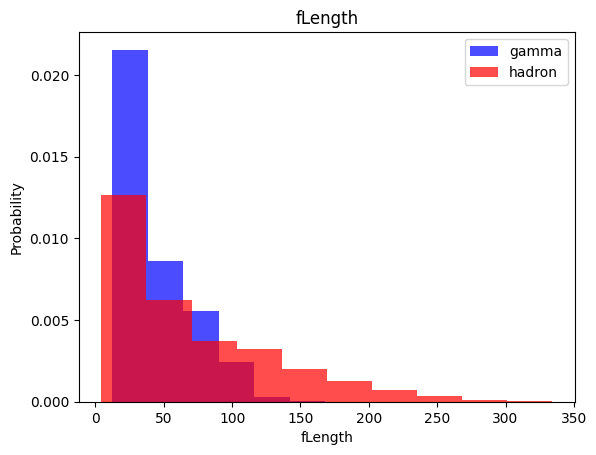

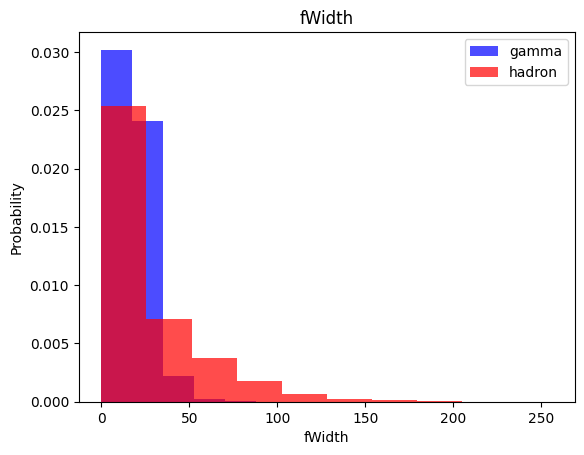

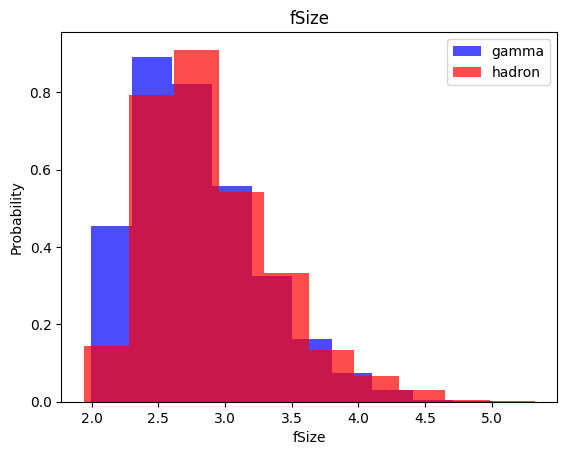

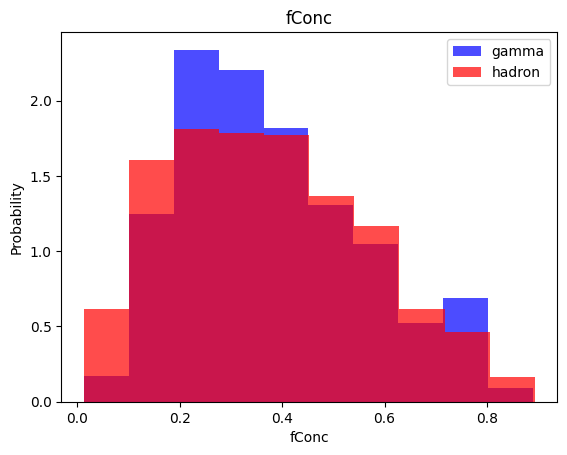

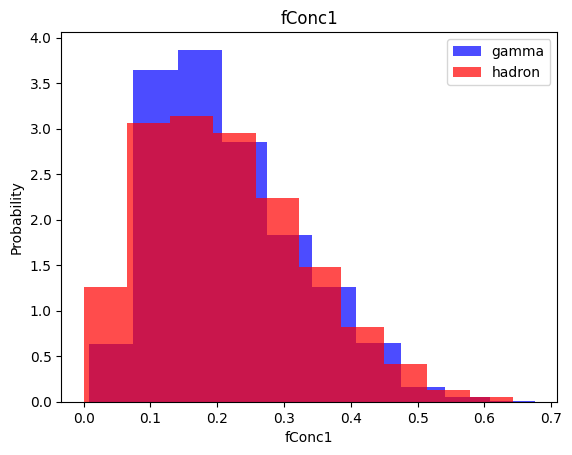

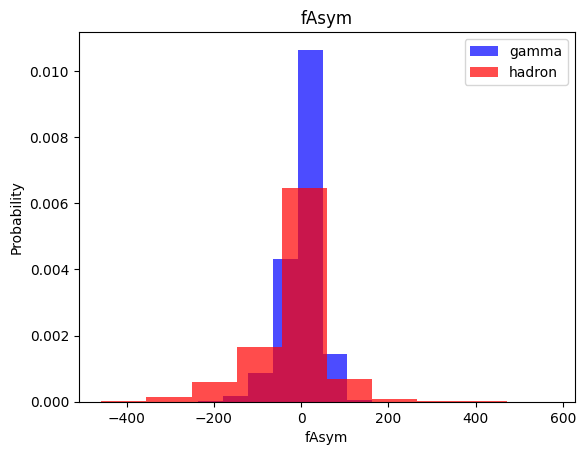

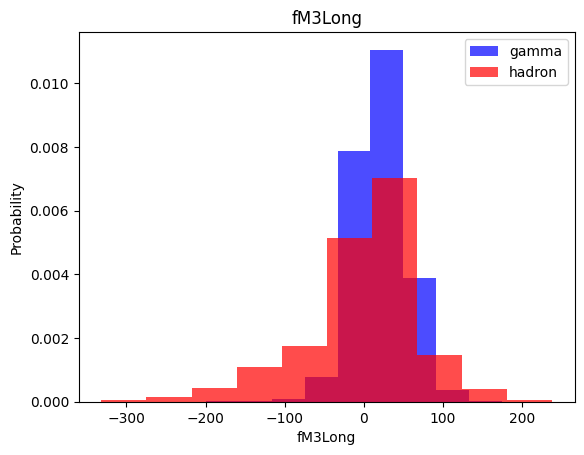

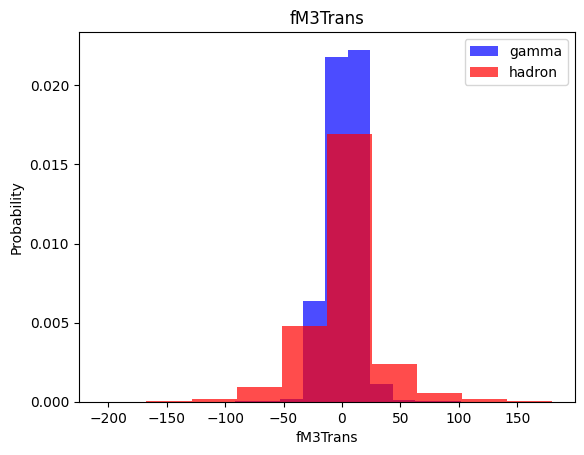

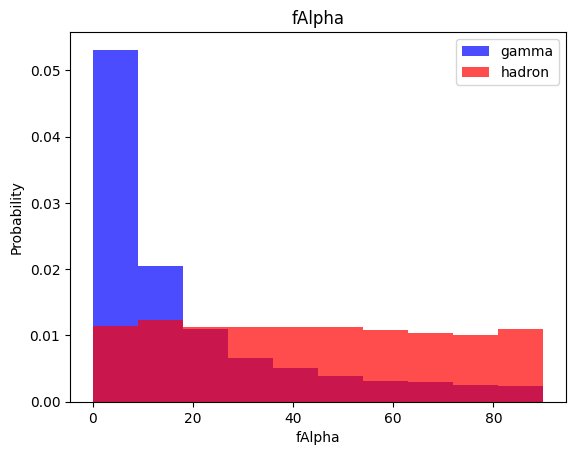

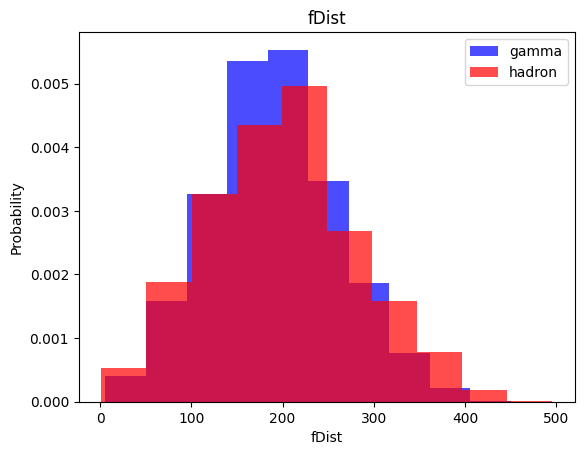

In [213]:
for label in cols[:-1]:
    plt.hist(df[df["class"]==1][label], color='blue', label='gamma', alpha=0.7, density=True)
    plt.hist(df[df["class"]==0][label], color='red', label='hadron', alpha=0.7, density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [214]:
# Using DataFrame.transpose instead of swapaxes
train, valid, test = np.split(df.sample(frac=1), [int(0.6 * len(df)), int(0.8 * len(df))])


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [215]:
def scale_dataset(dataframe, oversample=False):
    x = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values    

    scaler = StandardScaler()
    x = scaler.fit_transform(x)

    if oversample:
        ros = RandomOverSampler()
        x, y = ros.fit_resample(x, y)

    data =np.hstack((x, np.reshape(y, (-1, 1))))

    return data, x, y
    

In [216]:
train, x_train, y_train = scale_dataset(train, oversample=True)
valid, x_valid, y_valid = scale_dataset(valid, oversample=False)
test, x_test, y_test = scale_dataset(test, oversample=False)

kNN

In [217]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [218]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [219]:
y_pred = knn_model.predict(x_test)

In [220]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.67      0.72      1334
           1       0.84      0.89      0.86      2470

    accuracy                           0.81      3804
   macro avg       0.80      0.78      0.79      3804
weighted avg       0.81      0.81      0.81      3804



In [221]:
from sklearn.naive_bayes import GaussianNB

In [222]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train, y_train)

In [223]:
y_pred = nb_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.39      0.50      1334
           1       0.73      0.90      0.81      2470

    accuracy                           0.72      3804
   macro avg       0.71      0.65      0.65      3804
weighted avg       0.72      0.72      0.70      3804



Log regression

In [224]:
from sklearn.linear_model import LogisticRegression

In [225]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train, y_train)

In [226]:
y_pred = lg_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.71      0.70      1334
           1       0.84      0.83      0.84      2470

    accuracy                           0.79      3804
   macro avg       0.77      0.77      0.77      3804
weighted avg       0.79      0.79      0.79      3804



SVM

In [227]:
from sklearn.svm import SVC

In [228]:
svm_model = SVC()
svm_model = svm_model.fit(x_train, y_train)

In [256]:
y_pred = svm_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.78      0.80      1334
           1       0.88      0.90      0.89      2470

    accuracy                           0.86      3804
   macro avg       0.85      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804



Neural Net

In [230]:
import tensorflow as tf

In [231]:
def plot_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('binary_crossentropy')
    ax1.grid(True)

    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.grid(True)
    plt.show()

    plt.show()

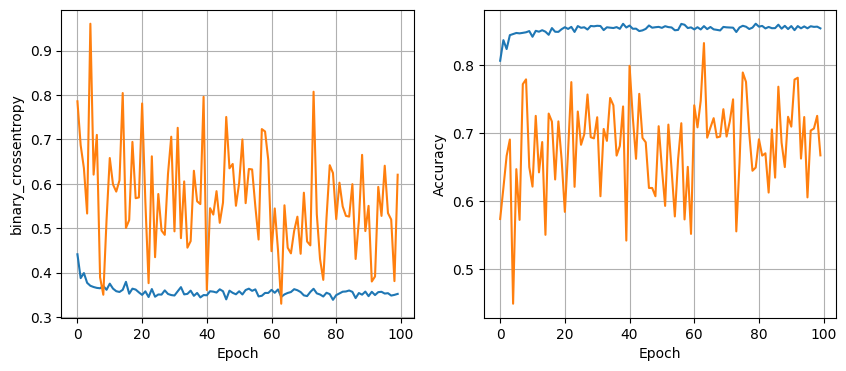

In [232]:
plot_history(history)

In [236]:
def train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation='relu', input_shape=(10,)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='binary_crossentropy',
                    metrics=['accuracy'])
    
    history = nn_model.fit(
    x_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=1
)
    return nn_model, history

16 nodes, dropout 0, lr 0.1, batch size 32
Epoch 1/100
370/370 [==============================] - 2s 2ms/step - loss: 0.4344 - accuracy: 0.8014 - val_loss: 0.7607 - val_accuracy: 0.6938
Epoch 2/100
370/370 [==============================] - 1s 2ms/step - loss: 0.3956 - accuracy: 0.8235 - val_loss: 0.5970 - val_accuracy: 0.6384
Epoch 3/100
370/370 [==============================] - 1s 2ms/step - loss: 0.3838 - accuracy: 0.8284 - val_loss: 0.4368 - val_accuracy: 0.9313
Epoch 4/100
370/370 [==============================] - 1s 2ms/step - loss: 0.3723 - accuracy: 0.8370 - val_loss: 0.4219 - val_accuracy: 0.7104
Epoch 5/100
370/370 [==============================] - 1s 2ms/step - loss: 0.3705 - accuracy: 0.8435 - val_loss: 0.8014 - val_accuracy: 0.5829
Epoch 6/100
370/370 [==============================] - 1s 2ms/step - loss: 0.3833 - accuracy: 0.8329 - val_loss: 0.4568 - val_accuracy: 0.7033
Epoch 7/100
370/370 [==============================] - 1s 2ms/step - loss: 0.3736 - accuracy: 0.843

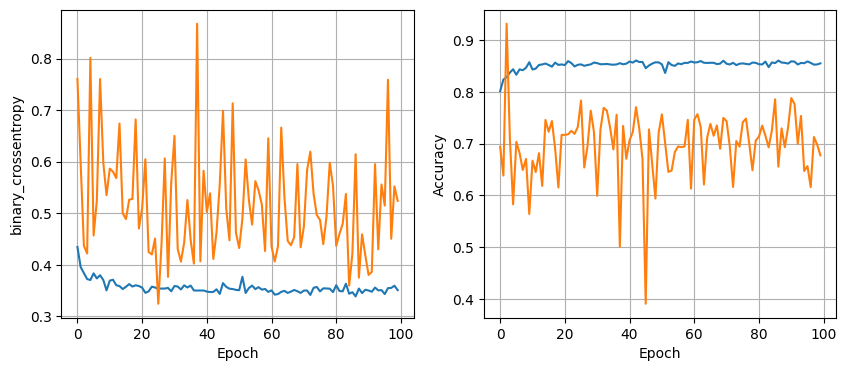

119/119 [==============================] - 0s 1ms/step - loss: 0.3599 - accuracy: 0.8457
16 nodes, dropout 0, lr 0.1, batch size 64
Epoch 1/100
185/185 [==============================] - 1s 3ms/step - loss: 0.4274 - accuracy: 0.8112 - val_loss: 0.4371 - val_accuracy: 0.7311
Epoch 2/100
185/185 [==============================] - 0s 2ms/step - loss: 0.3775 - accuracy: 0.8408 - val_loss: 0.4925 - val_accuracy: 0.7321
Epoch 3/100
185/185 [==============================] - 0s 2ms/step - loss: 0.3659 - accuracy: 0.8461 - val_loss: 0.4502 - val_accuracy: 0.7192
Epoch 4/100
185/185 [==============================] - 0s 2ms/step - loss: 0.3602 - accuracy: 0.8411 - val_loss: 0.5982 - val_accuracy: 0.6854
Epoch 5/100
185/185 [==============================] - 0s 2ms/step - loss: 0.3464 - accuracy: 0.8534 - val_loss: 0.4609 - val_accuracy: 0.7348
Epoch 6/100
185/185 [==============================] - 0s 2ms/step - loss: 0.3554 - accuracy: 0.8484 - val_loss: 0.5090 - val_accuracy: 0.7141
Epoch 7/10

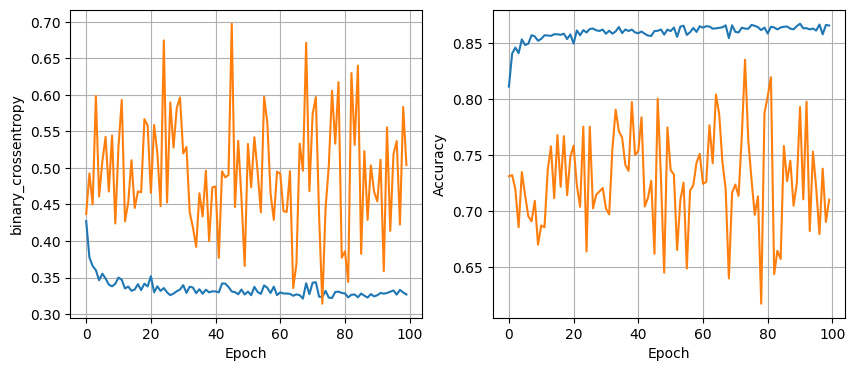

119/119 [==============================] - 0s 1ms/step - loss: 0.3559 - accuracy: 0.8591
16 nodes, dropout 0, lr 0.1, batch size 128
Epoch 1/100
93/93 [==============================] - 1s 4ms/step - loss: 0.4067 - accuracy: 0.8207 - val_loss: 0.5891 - val_accuracy: 0.6746
Epoch 2/100
93/93 [==============================] - 0s 2ms/step - loss: 0.3672 - accuracy: 0.8453 - val_loss: 0.4953 - val_accuracy: 0.7212
Epoch 3/100
93/93 [==============================] - 0s 2ms/step - loss: 0.3432 - accuracy: 0.8554 - val_loss: 0.4042 - val_accuracy: 0.7899
Epoch 4/100
93/93 [==============================] - 0s 2ms/step - loss: 0.3388 - accuracy: 0.8581 - val_loss: 0.4965 - val_accuracy: 0.7016
Epoch 5/100
93/93 [==============================] - 0s 2ms/step - loss: 0.3346 - accuracy: 0.8594 - val_loss: 0.3940 - val_accuracy: 0.7862
Epoch 6/100
93/93 [==============================] - 0s 2ms/step - loss: 0.3293 - accuracy: 0.8592 - val_loss: 0.6494 - val_accuracy: 0.6979
Epoch 7/100
93/93 [==

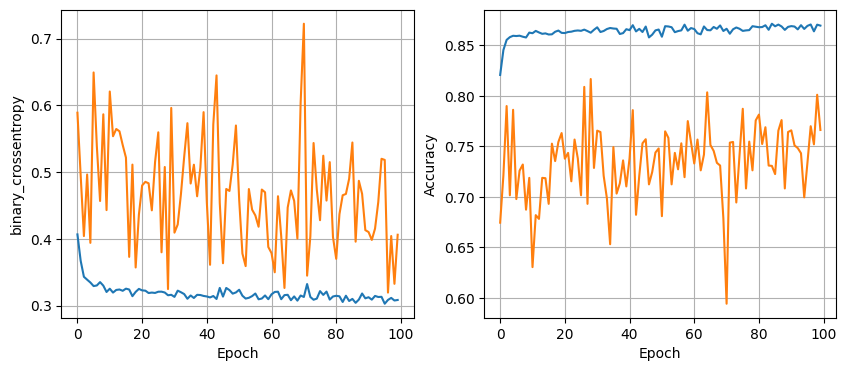

119/119 [==============================] - 0s 1ms/step - loss: 0.3621 - accuracy: 0.8657
16 nodes, dropout 0, lr 0.005, batch size 32
Epoch 1/100
370/370 [==============================] - 2s 2ms/step - loss: 0.4036 - accuracy: 0.8214 - val_loss: 0.5172 - val_accuracy: 0.7314
Epoch 2/100
370/370 [==============================] - 1s 2ms/step - loss: 0.3447 - accuracy: 0.8538 - val_loss: 0.5008 - val_accuracy: 0.7388
Epoch 3/100
370/370 [==============================] - 1s 2ms/step - loss: 0.3294 - accuracy: 0.8594 - val_loss: 0.4972 - val_accuracy: 0.7297
Epoch 4/100
370/370 [==============================] - 1s 2ms/step - loss: 0.3237 - accuracy: 0.8631 - val_loss: 0.5476 - val_accuracy: 0.7040
Epoch 5/100
370/370 [==============================] - 1s 2ms/step - loss: 0.3190 - accuracy: 0.8609 - val_loss: 0.4056 - val_accuracy: 0.7767
Epoch 6/100
370/370 [==============================] - 1s 2ms/step - loss: 0.3154 - accuracy: 0.8654 - val_loss: 0.5166 - val_accuracy: 0.7192
Epoch 7/

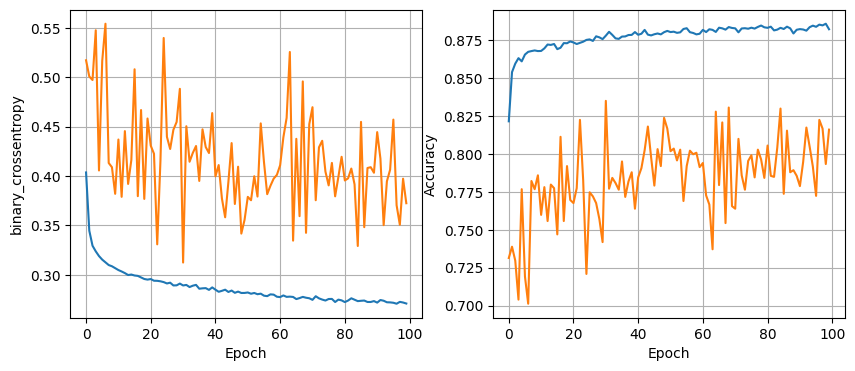

119/119 [==============================] - 0s 1ms/step - loss: 0.3341 - accuracy: 0.8704
16 nodes, dropout 0, lr 0.005, batch size 64
Epoch 1/100
185/185 [==============================] - 1s 3ms/step - loss: 0.4166 - accuracy: 0.8112 - val_loss: 0.4872 - val_accuracy: 0.7642
Epoch 2/100
185/185 [==============================] - 0s 2ms/step - loss: 0.3564 - accuracy: 0.8505 - val_loss: 0.4467 - val_accuracy: 0.7930
Epoch 3/100
185/185 [==============================] - 0s 2ms/step - loss: 0.3383 - accuracy: 0.8571 - val_loss: 0.5491 - val_accuracy: 0.7338
Epoch 4/100
185/185 [==============================] - 0s 2ms/step - loss: 0.3288 - accuracy: 0.8577 - val_loss: 0.4683 - val_accuracy: 0.7601
Epoch 5/100
185/185 [==============================] - 0s 2ms/step - loss: 0.3231 - accuracy: 0.8660 - val_loss: 0.4721 - val_accuracy: 0.7585
Epoch 6/100
185/185 [==============================] - 0s 2ms/step - loss: 0.3160 - accuracy: 0.8663 - val_loss: 0.4460 - val_accuracy: 0.7733
Epoch 7/

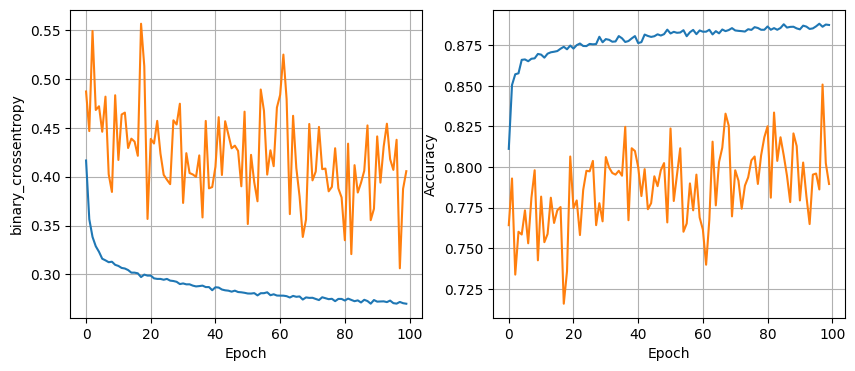

119/119 [==============================] - 0s 2ms/step - loss: 0.3365 - accuracy: 0.8712
16 nodes, dropout 0, lr 0.005, batch size 128
Epoch 1/100
93/93 [==============================] - 1s 4ms/step - loss: 0.4674 - accuracy: 0.7807 - val_loss: 0.6102 - val_accuracy: 0.6397
Epoch 2/100
93/93 [==============================] - 0s 2ms/step - loss: 0.3584 - accuracy: 0.8457 - val_loss: 0.4962 - val_accuracy: 0.7348
Epoch 3/100
93/93 [==============================] - 0s 2ms/step - loss: 0.3398 - accuracy: 0.8533 - val_loss: 0.4807 - val_accuracy: 0.7612
Epoch 4/100
93/93 [==============================] - 0s 2ms/step - loss: 0.3334 - accuracy: 0.8596 - val_loss: 0.4983 - val_accuracy: 0.7480
Epoch 5/100
93/93 [==============================] - 0s 2ms/step - loss: 0.3292 - accuracy: 0.8609 - val_loss: 0.5324 - val_accuracy: 0.7246
Epoch 6/100
93/93 [==============================] - 0s 2ms/step - loss: 0.3225 - accuracy: 0.8658 - val_loss: 0.5076 - val_accuracy: 0.7402
Epoch 7/100
93/93 [

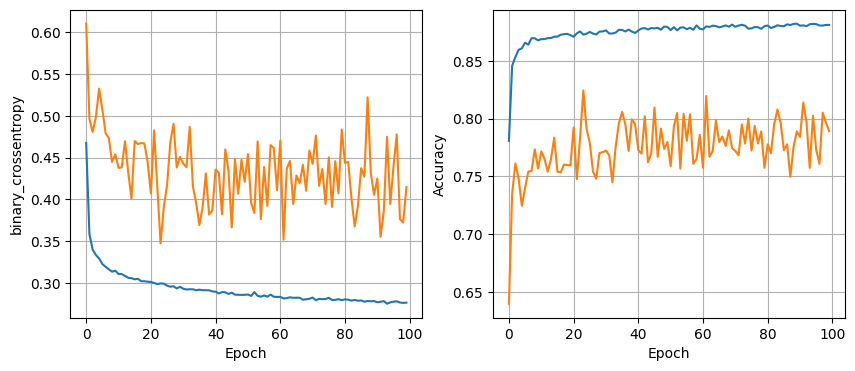

119/119 [==============================] - 0s 1ms/step - loss: 0.3330 - accuracy: 0.8691
16 nodes, dropout 0, lr 0.001, batch size 32
Epoch 1/100
370/370 [==============================] - 2s 2ms/step - loss: 0.5030 - accuracy: 0.7449 - val_loss: 0.6088 - val_accuracy: 0.6604
Epoch 2/100
370/370 [==============================] - 1s 2ms/step - loss: 0.3841 - accuracy: 0.8293 - val_loss: 0.5827 - val_accuracy: 0.6803
Epoch 3/100
370/370 [==============================] - 1s 2ms/step - loss: 0.3612 - accuracy: 0.8453 - val_loss: 0.5357 - val_accuracy: 0.7260
Epoch 4/100
370/370 [==============================] - 1s 2ms/step - loss: 0.3495 - accuracy: 0.8500 - val_loss: 0.5227 - val_accuracy: 0.7395
Epoch 5/100
370/370 [==============================] - 1s 2ms/step - loss: 0.3424 - accuracy: 0.8532 - val_loss: 0.4899 - val_accuracy: 0.7585
Epoch 6/100
370/370 [==============================] - 1s 2ms/step - loss: 0.3377 - accuracy: 0.8550 - val_loss: 0.4493 - val_accuracy: 0.7852
Epoch 7/

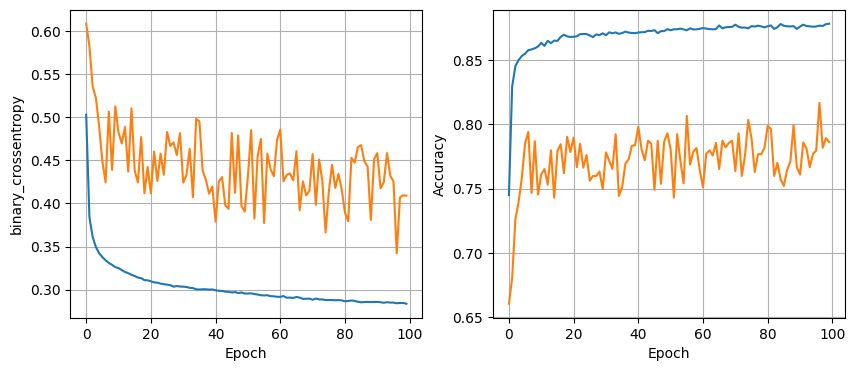

119/119 [==============================] - 0s 1ms/step - loss: 0.3246 - accuracy: 0.8699
16 nodes, dropout 0, lr 0.001, batch size 64
Epoch 1/100
185/185 [==============================] - 1s 3ms/step - loss: 0.5902 - accuracy: 0.6671 - val_loss: 0.6532 - val_accuracy: 0.5643
Epoch 2/100
185/185 [==============================] - 0s 2ms/step - loss: 0.4151 - accuracy: 0.8071 - val_loss: 0.6005 - val_accuracy: 0.6671
Epoch 3/100
185/185 [==============================] - 0s 2ms/step - loss: 0.3904 - accuracy: 0.8222 - val_loss: 0.5793 - val_accuracy: 0.6837
Epoch 4/100
185/185 [==============================] - 0s 2ms/step - loss: 0.3750 - accuracy: 0.8333 - val_loss: 0.5819 - val_accuracy: 0.6911
Epoch 5/100
185/185 [==============================] - 0s 2ms/step - loss: 0.3618 - accuracy: 0.8421 - val_loss: 0.5209 - val_accuracy: 0.7283
Epoch 6/100
185/185 [==============================] - 0s 2ms/step - loss: 0.3516 - accuracy: 0.8487 - val_loss: 0.5064 - val_accuracy: 0.7520
Epoch 7/

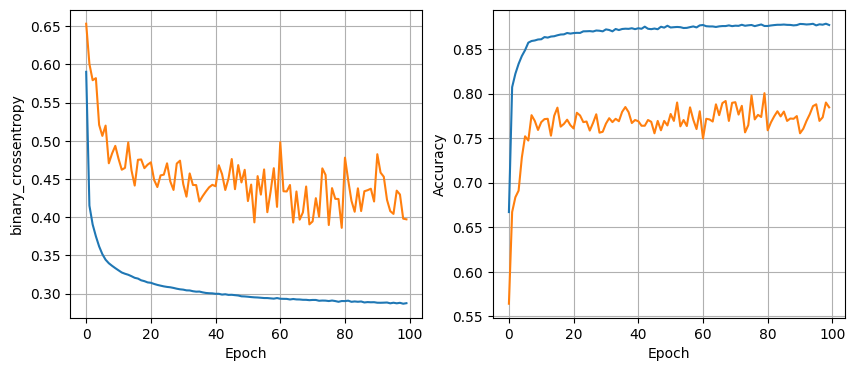

119/119 [==============================] - 0s 1ms/step - loss: 0.3306 - accuracy: 0.8615
16 nodes, dropout 0, lr 0.001, batch size 128
Epoch 1/100
93/93 [==============================] - 1s 4ms/step - loss: 0.6366 - accuracy: 0.6755 - val_loss: 0.7778 - val_accuracy: 0.4628
Epoch 2/100
93/93 [==============================] - 0s 2ms/step - loss: 0.5063 - accuracy: 0.7647 - val_loss: 0.6572 - val_accuracy: 0.6110
Epoch 3/100
93/93 [==============================] - 0s 2ms/step - loss: 0.4420 - accuracy: 0.7908 - val_loss: 0.6096 - val_accuracy: 0.6455
Epoch 4/100
93/93 [==============================] - 0s 2ms/step - loss: 0.4122 - accuracy: 0.8075 - val_loss: 0.5851 - val_accuracy: 0.6725
Epoch 5/100
93/93 [==============================] - 0s 2ms/step - loss: 0.3935 - accuracy: 0.8195 - val_loss: 0.5831 - val_accuracy: 0.6776
Epoch 6/100
93/93 [==============================] - 0s 2ms/step - loss: 0.3792 - accuracy: 0.8320 - val_loss: 0.5821 - val_accuracy: 0.6888
Epoch 7/100
93/93 [

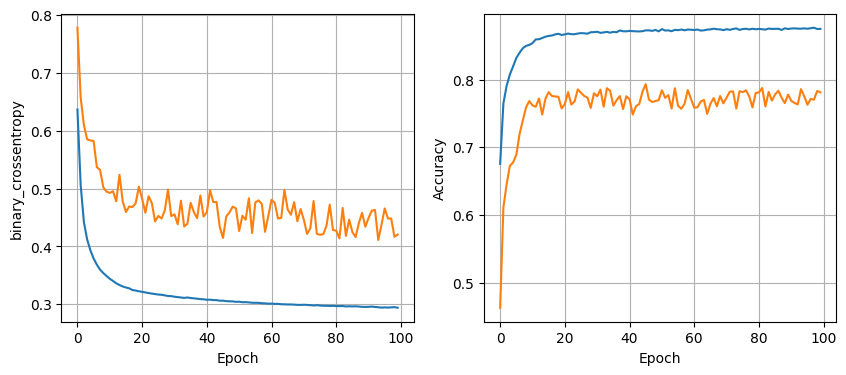

119/119 [==============================] - 0s 2ms/step - loss: 0.3344 - accuracy: 0.8657
16 nodes, dropout 0.2, lr 0.1, batch size 32
Epoch 1/100
370/370 [==============================] - 2s 2ms/step - loss: 0.5106 - accuracy: 0.7651 - val_loss: 0.6956 - val_accuracy: 0.5399
Epoch 2/100
370/370 [==============================] - 1s 2ms/step - loss: 0.4836 - accuracy: 0.7789 - val_loss: 0.5587 - val_accuracy: 0.6086
Epoch 3/100
370/370 [==============================] - 1s 2ms/step - loss: 0.4765 - accuracy: 0.7857 - val_loss: 0.6063 - val_accuracy: 0.5842
Epoch 4/100
370/370 [==============================] - 1s 2ms/step - loss: 0.4701 - accuracy: 0.7944 - val_loss: 0.5684 - val_accuracy: 0.5683
Epoch 5/100
370/370 [==============================] - 1s 2ms/step - loss: 0.4629 - accuracy: 0.8007 - val_loss: 0.5220 - val_accuracy: 0.6421
Epoch 6/100
370/370 [==============================] - 1s 2ms/step - loss: 0.4626 - accuracy: 0.8005 - val_loss: 0.4623 - val_accuracy: 0.6458
Epoch 7/

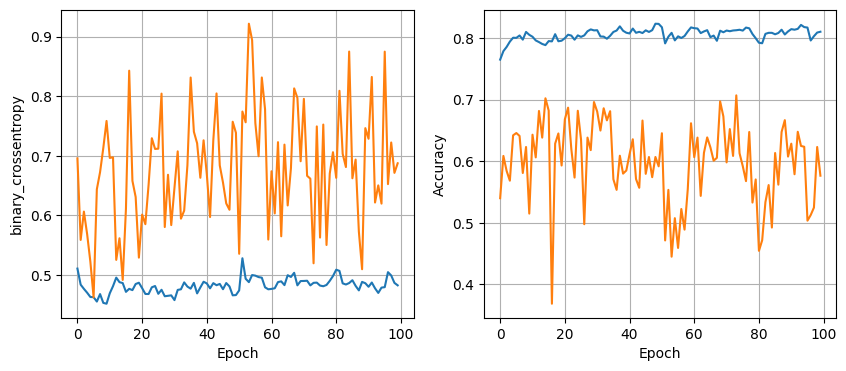

119/119 [==============================] - 0s 1ms/step - loss: 0.4467 - accuracy: 0.8291
16 nodes, dropout 0.2, lr 0.1, batch size 64
Epoch 1/100
185/185 [==============================] - 1s 3ms/step - loss: 0.4680 - accuracy: 0.7888 - val_loss: 0.3965 - val_accuracy: 0.7656
Epoch 2/100
185/185 [==============================] - 0s 2ms/step - loss: 0.4358 - accuracy: 0.8087 - val_loss: 0.3759 - val_accuracy: 0.7240
Epoch 3/100
185/185 [==============================] - 0s 2ms/step - loss: 0.4394 - accuracy: 0.8134 - val_loss: 0.5601 - val_accuracy: 0.6664
Epoch 4/100
185/185 [==============================] - 0s 2ms/step - loss: 0.4388 - accuracy: 0.8087 - val_loss: 0.4360 - val_accuracy: 0.7365
Epoch 5/100
185/185 [==============================] - 0s 2ms/step - loss: 0.4445 - accuracy: 0.8103 - val_loss: 0.5808 - val_accuracy: 0.6421
Epoch 6/100
185/185 [==============================] - 0s 2ms/step - loss: 0.4264 - accuracy: 0.8170 - val_loss: 0.5767 - val_accuracy: 0.5968
Epoch 7/

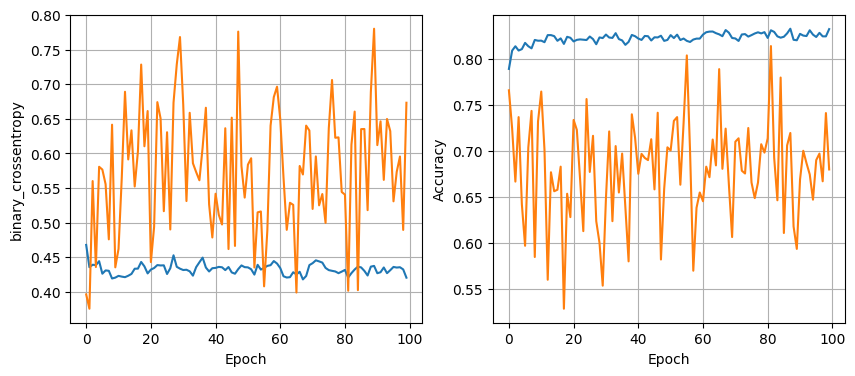

119/119 [==============================] - 0s 2ms/step - loss: 0.4023 - accuracy: 0.8512
16 nodes, dropout 0.2, lr 0.1, batch size 128
Epoch 1/100
93/93 [==============================] - 1s 4ms/step - loss: 0.4650 - accuracy: 0.7805 - val_loss: 0.4663 - val_accuracy: 0.7250
Epoch 2/100
93/93 [==============================] - 0s 2ms/step - loss: 0.4225 - accuracy: 0.8106 - val_loss: 0.4682 - val_accuracy: 0.7077
Epoch 3/100
93/93 [==============================] - 0s 2ms/step - loss: 0.4074 - accuracy: 0.8221 - val_loss: 0.4723 - val_accuracy: 0.6867
Epoch 4/100
93/93 [==============================] - 0s 2ms/step - loss: 0.4042 - accuracy: 0.8254 - val_loss: 0.5818 - val_accuracy: 0.6211
Epoch 5/100
93/93 [==============================] - 0s 2ms/step - loss: 0.3946 - accuracy: 0.8320 - val_loss: 0.4150 - val_accuracy: 0.7422
Epoch 6/100
93/93 [==============================] - 0s 2ms/step - loss: 0.3903 - accuracy: 0.8319 - val_loss: 0.4480 - val_accuracy: 0.6752
Epoch 7/100
93/93 [

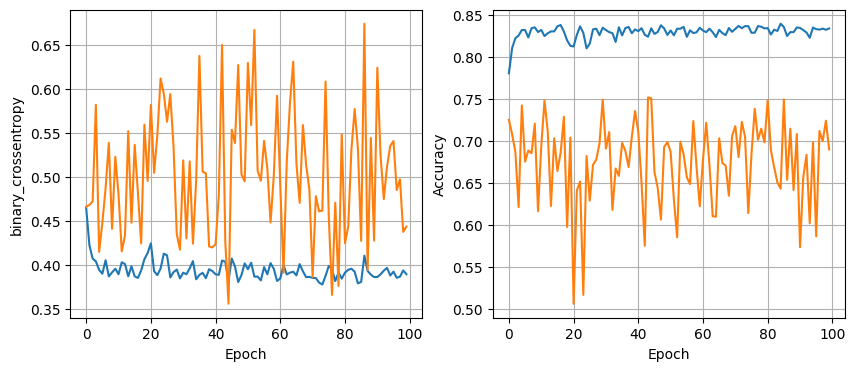

119/119 [==============================] - 0s 1ms/step - loss: 0.3631 - accuracy: 0.8565
16 nodes, dropout 0.2, lr 0.005, batch size 32
Epoch 1/100
370/370 [==============================] - 2s 2ms/step - loss: 0.4866 - accuracy: 0.7637 - val_loss: 0.6422 - val_accuracy: 0.6363
Epoch 2/100
370/370 [==============================] - 1s 2ms/step - loss: 0.4029 - accuracy: 0.8249 - val_loss: 0.6155 - val_accuracy: 0.6600
Epoch 3/100
370/370 [==============================] - 1s 2ms/step - loss: 0.3811 - accuracy: 0.8390 - val_loss: 0.4843 - val_accuracy: 0.7243
Epoch 4/100
370/370 [==============================] - 1s 2ms/step - loss: 0.3710 - accuracy: 0.8421 - val_loss: 0.5010 - val_accuracy: 0.7104
Epoch 5/100
370/370 [==============================] - 1s 2ms/step - loss: 0.3644 - accuracy: 0.8448 - val_loss: 0.5397 - val_accuracy: 0.7023
Epoch 6/100
370/370 [==============================] - 1s 2ms/step - loss: 0.3637 - accuracy: 0.8436 - val_loss: 0.5586 - val_accuracy: 0.6989
Epoch 

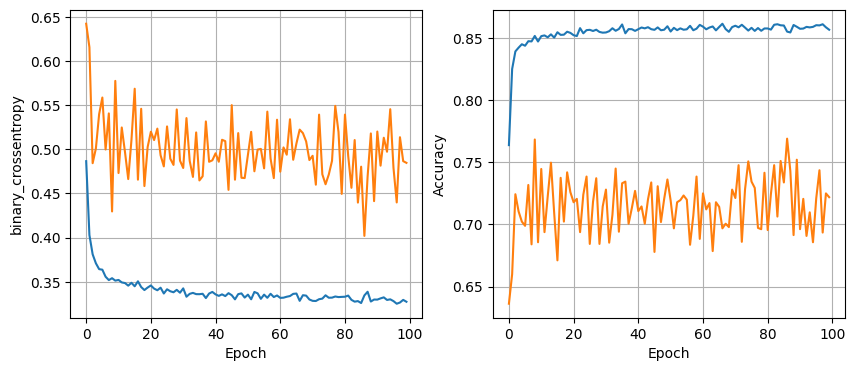

119/119 [==============================] - 0s 1ms/step - loss: 0.3264 - accuracy: 0.8662
16 nodes, dropout 0.2, lr 0.005, batch size 64
Epoch 1/100
185/185 [==============================] - 2s 3ms/step - loss: 0.4935 - accuracy: 0.7610 - val_loss: 0.5766 - val_accuracy: 0.6894
Epoch 2/100
185/185 [==============================] - 0s 2ms/step - loss: 0.4079 - accuracy: 0.8234 - val_loss: 0.5281 - val_accuracy: 0.7162
Epoch 3/100
185/185 [==============================] - 0s 2ms/step - loss: 0.3858 - accuracy: 0.8354 - val_loss: 0.5429 - val_accuracy: 0.7091
Epoch 4/100
185/185 [==============================] - 0s 2ms/step - loss: 0.3699 - accuracy: 0.8436 - val_loss: 0.5361 - val_accuracy: 0.7057
Epoch 5/100
185/185 [==============================] - 0s 2ms/step - loss: 0.3656 - accuracy: 0.8454 - val_loss: 0.4696 - val_accuracy: 0.7338
Epoch 6/100
185/185 [==============================] - 0s 2ms/step - loss: 0.3652 - accuracy: 0.8469 - val_loss: 0.4591 - val_accuracy: 0.7564
Epoch 

KeyboardInterrupt: 

In [235]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
    for dropout_prob in[0, 0.2]:
        for lr in [0.1, 0.005, 0.001]:
            for batch_size in [32, 64, 128]:
                print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
                model, history = train_model(x_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
                plot_history(history)
                val_loss = model.evaluate(x_valid, y_valid)
                if val_loss[0] < least_val_loss:
                    least_val_loss = val_loss[0]
                    least_loss_model = model

In [257]:
y_pred = least_loss_model.predict(x_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

119/119 [==============================] - 0s 2ms/step


In [260]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80      1334
           1       0.88      0.93      0.90      2470

    accuracy                           0.87      3804
   macro avg       0.87      0.84      0.85      3804
weighted avg       0.87      0.87      0.87      3804

